In [1]:
%pylab inline

import pandas as pd
gold = 8.*np.array([1,1/((1+sqrt(5))/2)])

Populating the interactive namespace from numpy and matplotlib


In [2]:
# This function makes the plots look prettier on GitHub. 
### to do: figure out how to make this automatic.

def fix_boxplot(parts):
    for m in parts['fliers']:
        m.set_markersize(12)
        m.set_markeredgewidth(1)
    for b in parts['boxes']:
        b.set_linewidth(2)
    for w in parts['whiskers']:
        w.set_linewidth(2)
    for c in parts['caps']:
        c.set_linewidth(2)
    for m in parts['medians']:
        m.set_linewidth(2)
    for m in parts['means']:
        m.set_linewidth(2)
        m.set_color('g')
        m.set_markerfacecolor('g')

# Problem 2.1

The text provides a Minitab file with a three column data set. I've extracted that data into a comma-delimited text file. (I have also changed the values to different distributions to prevent anyone from directly copying this work in a homework assignment.)

The data is 100 entries, formatted with three fields:
  * Income: household income in the sample
  * Ethnicity: three ethnic groups are seen in the population
  * Neighborhood: there are 20 neighboorhoods in the community, 5 from each in the sample

First, we are asked to display the Income data by Ethnicity in a boxplot, calculate the means of each distribution, and discuss.

The boxplot can be done easily, either with matplotlib directly or, as done here, within a pandas dataframe. I have loaded the data with pandas, and created the boxplot. The <font color=#338833>by</font> keyword allows us to group the data by another column value.

The default matplotlib handling makes a very poor plot for display. spacepy.plot fixes a lot of those issues, but then generates plots that are poor for GitHub. I have, for now, used a brute-force function to get the plot to render nicely for this format.

For calculating the means, the pandas dataframe has a <font color=#338833; face=monospace>groupby</font> method to sort out each distribution. Each distribution can then calculate its own mean with its internal method. I have also displayed the value of the mean to two decimal places on each plot.

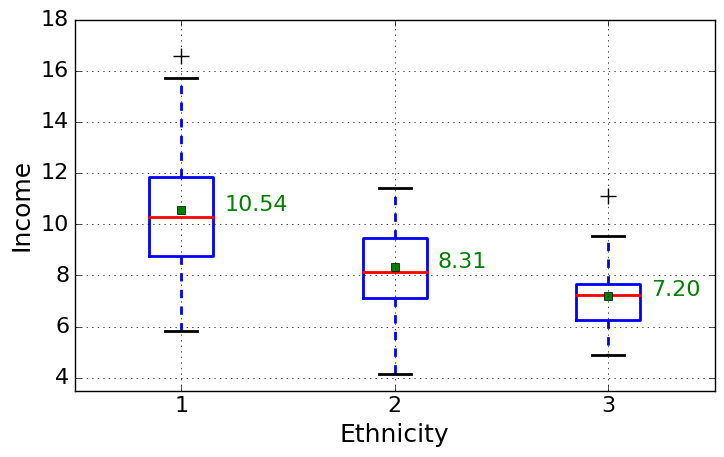

In [3]:
data = pd.read_csv('data_sample.txt')
parts = data.boxplot(column='Income',by='Ethnicity',showmeans=True,figsize=gold,fontsize=16,return_type='dict')
plt.title(''); plt.suptitle('')
plt.yticks(fontsize=16)
plt.ylabel("Income",fontsize=18)
plt.xlabel("Ethnicity",fontsize=18)
axis([0.5,3.5,3.5,18])
means = data.groupby(by='Ethnicity')['Income'].mean()
for eth in [1,2,3]:
    text(eth+0.2,means[eth],"{0:.2f}".format(means[eth]),color='g',fontsize=16)
fix_boxplot(parts['Income'])

Next, we want to examine how a simple sampling method (one not taking any factors into account) affects the statistics of the sample distribution. Here, we create a new pandas data frame with 200 entries, each a random sample of 20 from the population. We keep track of the sample mean, and the count of sampled individuals from each ethnic group.

In [4]:
simple = pd.DataFrame(columns=["Mean","Count 1", "Count 2", "Count 3"])
for i in range(200):
    sample = data.sample(20,replace=False)
    counts=sample['Ethnicity'].value_counts()
    for k in [1,2,3]:
        if k not in counts.keys():
            counts[k]=0
    new_data = {'Mean':sample['Income'].mean(),
                'Count 1':counts[1],
                'Count 2':counts[2],
                'Count 3':counts[3]}
    simple = simple.append(new_data,ignore_index=True)

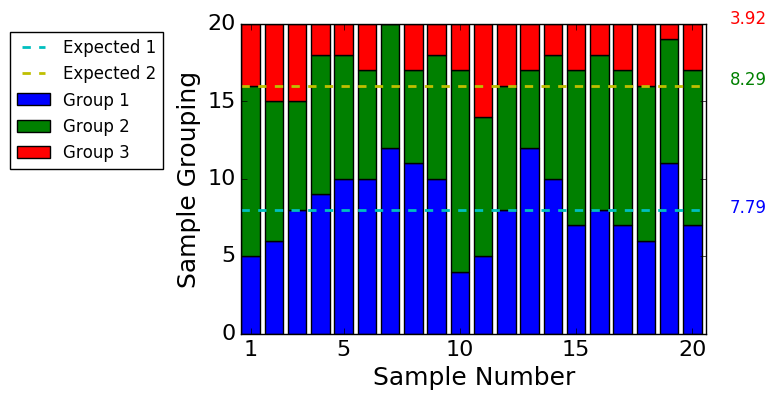

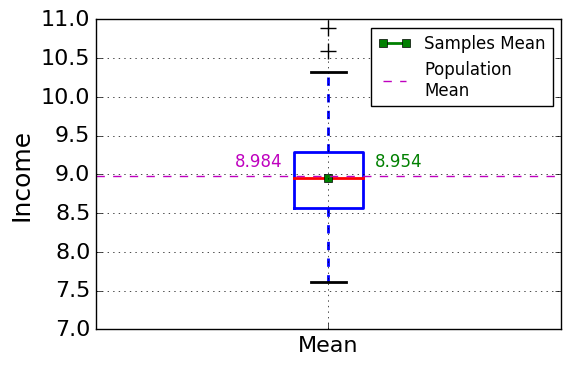

In [5]:
figure()
bar(range(20),simple['Count 1'][:20],color='b',label='Group 1')
bar(range(20),simple['Count 2'][:20],color='g',bottom=simple['Count 1'][:20],label='Group 2')
bar(range(20),simple['Count 3'][:20],color='r',bottom=simple['Count 1'][:20]+simple['Count 2'][:20],label='Group 3')
plot([0,20],[20*.4,20*.4],'c--',linewidth=2,label='Expected 1')
plot([0,20],[20*.8,20*.8],'y--',linewidth=2,label='Expected 2')
plt.xticks([0.4,4.4,9.4,14.4,19.4],[1,5,10,15,20],fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Sample Number",fontsize=18)
plt.ylabel("Sample Grouping",fontsize=18)
legend(bbox_to_anchor=[-0.15,1.0])
text(21,simple['Count 1'].mean(),"{0:.2f}".format(simple['Count 1'].mean()),color='b',fontsize=12)
text(21,simple['Count 1'].mean()+simple['Count 2'].mean(),"{0:.2f}".format(simple['Count 2'].mean()),color='g',fontsize=12)
text(21,20,"{0:.2f}".format(simple['Count 3'].mean()),color='r',fontsize=12)

figure()
parts = simple.boxplot(column='Mean',showmeans=True,return_type='dict',fontsize=16)
parts['means'][0].set_label("Samples Mean")
plot([0.5,1.5],data['Income'].mean()*np.ones(2),'m--',label='Population\nMean')
plt.yticks(fontsize=16)
plt.ylabel("Income",fontsize=18)
fix_boxplot(parts)
axis([0.5,1.5,7.,11])
text(0.8,9.1,"{0:.3f}".format(data['Income'].mean()),color='m',fontsize=12)
text(1.1,9.1,"{0:.3f}".format(simple['Mean'].mean()),color='g',fontsize=12)
legend()